In [101]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random

from tensorflow import keras

In [102]:
dataset = keras.datasets.cifar10.load_data()

(X_train , y_train),(X_test , y_test) = dataset

In [107]:
print(f'X_train size : {X_train.shape} , \ty_train size : {y_train.shape}')
print(f'X_test size : {X_test.shape} , \ty_test size : {y_test.shape}')

X_train size : (50000, 32, 32, 3) , 	y_train size : (50000, 1)
X_test size : (10000, 32, 32, 3) , 	y_test size : (10000, 1)


label = [9]


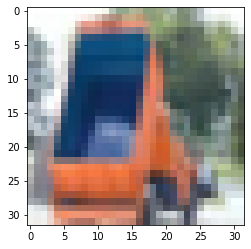

In [108]:
i = random.randint(0,len(X_train))
plt.imshow(X_train[i])

print(f'label = {y_train[i]}')

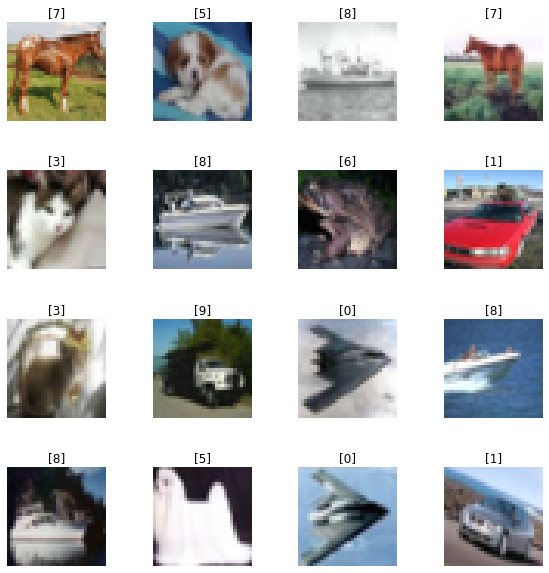

In [110]:
W_grid =4
L_grid =4

fig , axes = plt.subplots(L_grid, W_grid, figsize=(10, 10))

axes = axes.ravel()

n = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = random.randint(0,n)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace= 0.5)

In [111]:
# convert our train and test data into float32 format.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [112]:
number_class = 10
y_train = tf.keras.utils.to_categorical(y_train, number_class)
y_test = tf.keras.utils.to_categorical(y_test, number_class)

In [113]:
pd.get_option("display.max_rows")


60

In [114]:
X_train = X_train / 255
X_test = X_test / 255

In [115]:
CNN = keras.Sequential()

CNN.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (32,32,3),name="Conv2D_1"))
CNN.add(keras.layers.Conv2D(32, (3,3), activation='relu',name="Conv2D_2"))
CNN.add(keras.layers.MaxPooling2D(2,2))
CNN.add(keras.layers.Dropout(0.3))


CNN.add(keras.layers.Conv2D(64, (3,3), activation='relu',name="Conv2D_3"))
CNN.add(keras.layers.Conv2D(64, (3,3), activation='relu',name="Conv2D_4"))
CNN.add(keras.layers.MaxPooling2D(2,2))
CNN.add(keras.layers.Dropout(0.3))

CNN.add(keras.layers.Flatten())

CNN.add(keras.layers.Dense(1024,activation='relu',name="Hiden_Layer1"))
CNN.add(keras.layers.Dropout(0.3))

CNN.add(keras.layers.Dense(1024,activation='relu',name="Hiden_Layer2"))
CNN.add(keras.layers.Dense(10, activation='softmax',name="Output"))

CNN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 Conv2D_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 Conv2D_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 Conv2D_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [120]:
CNN.compile(optimizer = tf.keras.optimizers.Adam(0.0001, decay = 1e-6), loss='categorical_crossentropy',metrics = ['accuracy'])

In [122]:
history =CNN.fit(X_train, y_train, batch_size=512, epochs = 1)

98/98 [==============================] - 57s 581ms/step - loss: 1.6252 - accuracy: 0.4124


In [ ]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

In [ ]:
predicted_classes = cnn.predict(X_test)

In [ ]:
predicted_classes = predicted_classes.argmax(1)

In [ ]:
from sklearn.metrics import confusion_matrix

# let's also use heatmap from seaborn to visualize our matrix
import seaborn as sns

cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (10, 10)) 
axes = axes.ravel()

for i in np.arange(0, L*W): 
    axes[i].imshow(X_test[i]) 
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)